In [1]:
import numpy as np
from numpy import linalg as LA
from keras.datasets import mnist, fashion_mnist
import pandas as pd
from keras.layers import Input, Dense, concatenate 
from keras.models import Model, load_model
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
from sklearn.decomposition import PCA
import glob
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras import objectives
#from MulticoreTSNE import MulticoreTSNE as TSNEGPU
import tensorflow as tf
from sklearn import manifold
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [2]:
import numpy as np
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow import keras



def fashion_scatter(x, colors):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as PathEffects
    # on choisit une palette de de couleur avec seaborn
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # on crée le scatter-plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # on ajoute les labels pour chaque digit correspondant au label
    txts = []

    for i in range(num_classes):
        # position de chaque label au milieu des points

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


def kmeans_fit(X,y_train):
    import time
    from sklearn.metrics.cluster import adjusted_mutual_info_score
    from sklearn.metrics.cluster import normalized_mutual_info_score
    from sklearn.metrics.cluster import adjusted_rand_score
    
    #(x_train_encoded, y_train), (x_test_encoded, y_train) = get_encoded_data()

    #encoded data
    k_means = KMeans(n_clusters=10, random_state=40,init='k-means++', n_init=30, max_iter=500)
    #time_start = time.time()
    k_means.fit(X)
    #print('K-means done! Time elapsed: {} seconds'.format(time.time() - time_start))
    test_clusters = k_means.labels_
  

    
    score_nmi = normalized_mutual_info_score(y_train, test_clusters)
    score_ari=adjusted_rand_score(y_train, test_clusters)
    
    #print("ami k-means encoded data: ", score_ami+0.2)
    #print("nmi k-means encoded data: ", score_ari+0.2)
    return score_ari,score_nmi
    

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train=x_train[0:6000,]
x_test=x_test[0:6000,]
y_train=y_train[0:6000,]
y_test=y_test[0:6000,]

In [4]:
def tsne(per,X,y_train):
    import time
    from sklearn.manifold import TSNE
    
    #(x_train_encoded, y_train), (x_test_encoded, y_test) = get_encoded_data()
    time_start = time.time()
    print('encoded data')
    tsne = TSNE(n_components=2, verbose=1, perplexity=per, n_iter=250)
    tsne_results = tsne.fit_transform(X)
    figure, _, _, _ = fashion_scatter(tsne_results, y_train)
    figure.show()
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

In [14]:
nombre_classe = 10
dim=784

#creation deep ae
input_img = Input(shape=(dim,), name="inp_img")

encoded = Dense(784, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
bottlenek_layer=Dense(nombre_classe, activation='relu', name="bottleneck_layer")(encoded)
decoded = Dense(32, activation='relu')(bottlenek_layer)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)
output = Dense(dim, activation='sigmoid', name="logits")(decoded)
  


autoencoder = Model(input_img, decoded)

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.023s...
[t-SNE] Computed neighbors for 6000 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.161445
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.425087
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038932894407586850845513394230458323690322294816580855933212334827479782620414472316873817718091929988125040402618

D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 16.04779076576233 seconds


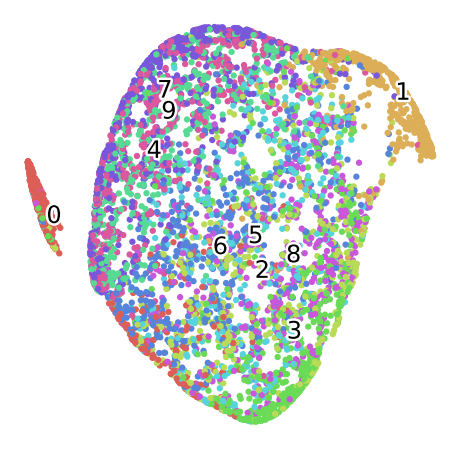

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)
ari,nmi=kmeans_fit(pca_result,y_train)
tsne(30,pca_result,y_train)

In [8]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.22818819788011935
nmi=  0.3658247084989377





Epoch 1/50





6000/6000 [==============================] - ETA: 1:22 - loss: 1.458 - ETA: 39s - loss: 1.340 - ETA: 25s - loss: 1.23 - ETA: 18s - loss: 1.15 - ETA: 11s - loss: 1.03 - ETA: 7s - loss: 0.9727 - ETA: 5s - loss: 0.926 - ETA: 3s - loss: 0.888 - ETA: 2s - loss: 0.859 - ETA: 1s - loss: 0.836 - ETA: 1s - loss: 0.820 - ETA: 0s - loss: 0.804 - ETA: 0s - loss: 0.791 - 5s 765us/step - loss: 0.7833
Epoch 2/50
6000/6000 [==============================] - ETA: 1s - loss: 0.636 - ETA: 0s - loss: 0.642 - ETA: 0s - loss: 0.638 - ETA: 0s - loss: 0.640 - ETA: 0s - loss: 0.642 - ETA: 0s - loss: 0.641 - ETA: 0s - loss: 0.639 - ETA: 0s - loss: 0.638 - ETA: 0s - loss: 0.637 - ETA: 0s - loss: 0.634 - ETA: 0s - loss: 0.631 - ETA: 0s - loss: 0.629 - ETA: 0s - loss: 0.628 - ETA: 0s - loss: 0.628 - 1s 179us/step - loss: 0.6275
Epoch 3/50
6000/6000 [==============================] - ETA: 0s - loss: 0.615 - ETA: 0s - loss: 0.615 - ETA: 0s - loss: 0.612 - ETA: 0s - loss: 0.614 - ETA: 0s - loss: 0.

6000/6000 [==============================] - ETA: 0s - loss: 0.389 - ETA: 1s - loss: 0.381 - ETA: 1s - loss: 0.383 - ETA: 1s - loss: 0.383 - ETA: 1s - loss: 0.381 - ETA: 1s - loss: 0.381 - ETA: 1s - loss: 0.379 - ETA: 1s - loss: 0.381 - ETA: 1s - loss: 0.384 - ETA: 1s - loss: 0.386 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.387 - 1s 238us/step - loss: 0.3878
Epoch 18/50
6000/6000 [==============================] - ETA: 1s - loss: 0.376 - ETA: 1s - loss: 0.378 - ETA: 1s - loss: 0.382 - ETA: 1s - loss: 0.382 - ETA: 1s - loss: 0.383 - ETA: 1s - loss: 0.383 - ETA: 1s - loss: 0.383 - ETA: 1s - loss: 0.380 - ETA: 1s - loss: 0.381 - ETA: 0s - loss: 0.379 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.381 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.381 - ETA: 0s - loss: 0.382 - ETA: 0s - loss: 0.383 - ETA: 

Epoch 35/50
6000/6000 [==============================] - ETA: 0s - loss: 0.438 - ETA: 0s - loss: 0.400 - ETA: 0s - loss: 0.393 - ETA: 0s - loss: 0.391 - ETA: 0s - loss: 0.386 - ETA: 0s - loss: 0.381 - ETA: 0s - loss: 0.383 - ETA: 0s - loss: 0.393 - ETA: 0s - loss: 0.402 - ETA: 0s - loss: 0.408 - ETA: 0s - loss: 0.413 - ETA: 0s - loss: 0.414 - 1s 117us/step - loss: 0.4142
Epoch 36/50
6000/6000 [==============================] - ETA: 0s - loss: 0.391 - ETA: 0s - loss: 0.393 - ETA: 0s - loss: 0.405 - ETA: 0s - loss: 0.403 - ETA: 0s - loss: 0.401 - ETA: 0s - loss: 0.399 - ETA: 0s - loss: 0.397 - ETA: 0s - loss: 0.393 - ETA: 0s - loss: 0.391 - ETA: 0s - loss: 0.390 - ETA: 0s - loss: 0.388 - ETA: 0s - loss: 0.387 - 1s 118us/step - loss: 0.3878
Epoch 37/50
6000/6000 [==============================] - ETA: 0s - loss: 0.367 - ETA: 0s - loss: 0.375 - ETA: 0s - loss: 0.368 - ETA: 0s - loss: 0.366 - ETA: 0s - loss: 0.363 - ETA: 0s - loss: 0.364 - ETA: 0s - loss: 0.362 - ETA: 0s - loss: 0.362 - ETA

D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.266s...
[t-SNE] Computed neighbors for 6000 samples in 19.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.402226
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.557083
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043567980705675258449965989174768031572607800285387605895586327668781715404589535143824642343213268894641827684675467035375169860499105765512820762454900903893289440758685084551339423045832369032229481658085593321233482747978262041447231687381771809192998812504040261

D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 33.812214851379395 seconds


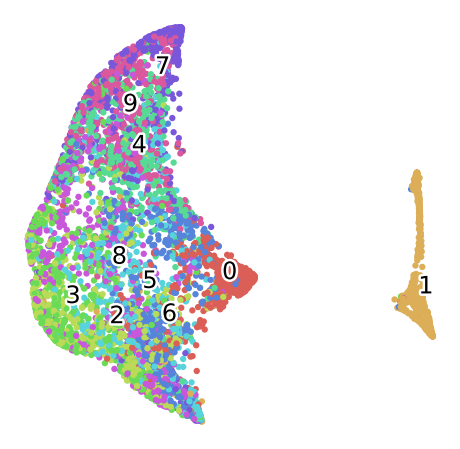

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)
ae = autoencoder.predict(x_test)
ari,nmi=kmeans_fit(ae,y_test)
tsne(30,ae,y_test)


In [17]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.2456780466828409
nmi=  0.38927266534746646


D:\annaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


encoded data
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.012s...
[t-SNE] Computed neighbors for 6000 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.000081
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.538857
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038932894407586850845513394230458323690322294816580855933212334827479782620414472316873817718091929988125040402618

D:\annaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


t-SNE done! Time elapsed: 20.058866262435913 seconds


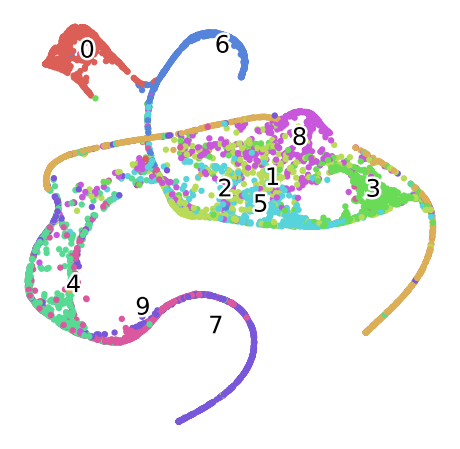

In [24]:
S = manifold.LocallyLinearEmbedding(n_neighbors=6, n_components=2,
                                        eigen_solver='auto',
                                        method='standard').fit_transform(x_train)
ari,nmi=kmeans_fit(S,y_train)
tsne(30,S ,y_train)

In [25]:
print("ari= ",ari)
print("nmi= ",nmi)

ari=  0.47178421954231803
nmi=  0.6066388861729478
